Missing values in TotalCharges: 11
customerID dropped.


C:\Users\midou\AppData\Local\Temp\ipykernel_24236\2772698575.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


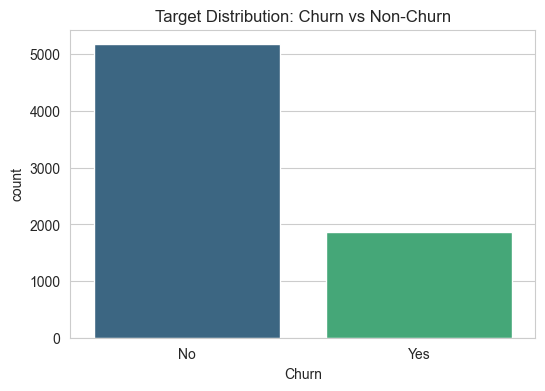

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


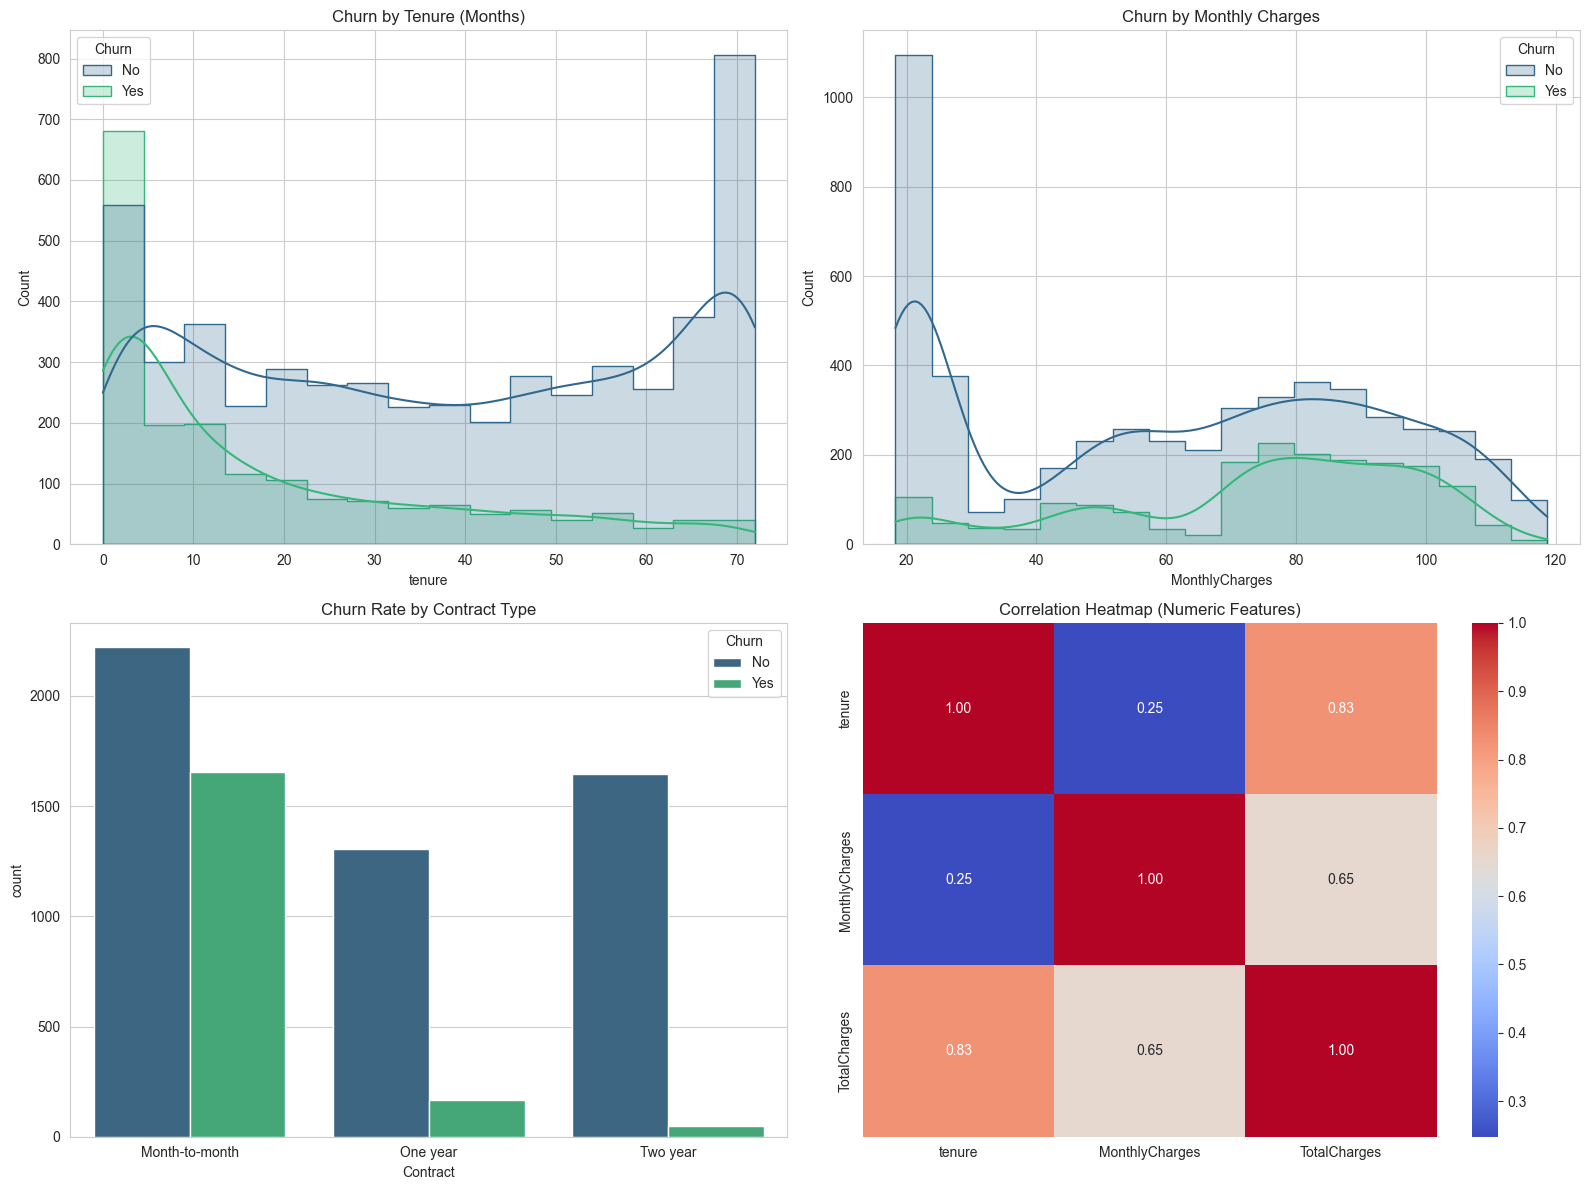

In [28]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath('..'))

from utils.preprocessing import load_data

# from utils.visualization import plot_scatter

df = load_data('../data/dataset.csv')




# Assuming 'df' is your dataframe name
# 1. Convert TotalCharges to numeric. 'coerce' turns invalid parsing into NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check how many missing values were created
missing_values = df['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges: {missing_values}")

# 3. Handling the missing values
# Since TotalCharges is likely 0 for new customers (tenure=0), let's fill them with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 4. Drop customerID (High cardinality, no predictive power)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("customerID dropped.")

# 5. Check the target distribution (Imbalance check)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Target Distribution: Churn vs Non-Churn')
plt.show()

# Print the numeric description now
print(df.describe())


import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set_style("whitegrid")

# Create a figure with subplots for organized viewing
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Plot 1: Tenure Distribution by Churn ---
# Intuition: Do new customers leave faster than loyal ones?
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element="step", ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Churn by Tenure (Months)')

# --- Plot 2: Monthly Charges Distribution by Churn ---
# Intuition: Do expensive plans drive customers away?
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element="step", ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Churn by Monthly Charges')

# --- Plot 3: Contract Type Impact ---
# Intuition: Are month-to-month contracts riskier?
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Churn Rate by Contract Type')

# --- Plot 4: Correlation Heatmap ---
# Intuition: Checking for Multicollinearity (explained below)
# We only use the numeric columns for correlation
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap (Numeric Features)')

plt.tight_layout()
plt.show()

